<a href="https://colab.research.google.com/github/VasireddyNandini/predictive-analysis/blob/customer_pred/customer_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-964139335.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_counts.index, y=zone_counts.values, palette="coolwarm")


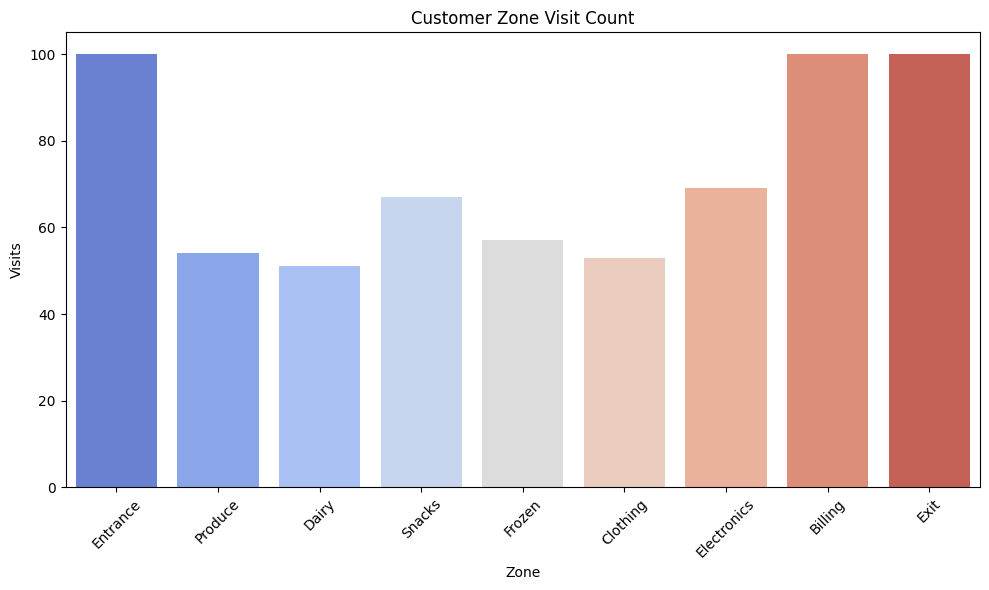

Customer C005 Path:
           Zone                       Time
27     Entrance 2025-07-02 03:53:57.923850
28      Produce 2025-07-02 03:54:57.923850
29  Electronics 2025-07-02 03:56:57.923850
30      Billing 2025-07-02 03:58:57.923850
31         Exit 2025-07-02 04:02:57.923850


In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Step 1: Define Store Layout Zones
store_zones = ['Entrance', 'Produce', 'Dairy', 'Snacks', 'Frozen', 'Clothing', 'Electronics', 'Billing', 'Exit']

# Step 2: Simulate Customer Paths
def generate_customer_path():
    path = ['Entrance']
    intermediate_zones = random.sample(store_zones[1:-2], random.randint(2, 5))  # random 2 to 5 stops
    path.extend(intermediate_zones)
    path.append('Billing')
    path.append('Exit')
    return path

# Step 3: Simulate Movement Timestamps
def generate_movement_log(customer_id):
    path = generate_customer_path()
    entry_time = datetime.now()
    log = []
    for i, zone in enumerate(path):
        timestamp = entry_time + timedelta(minutes=2 * i + random.randint(0, 2))  # 2-4 mins per zone
        log.append({'CustomerID': customer_id, 'Zone': zone, 'Time': timestamp})
    return log

# Step 4: Create Dataset for 100 Customers
movement_logs = []
for cid in range(1, 101):
    logs = generate_movement_log(f"C{cid:03}")
    movement_logs.extend(logs)

df = pd.DataFrame(movement_logs)

# Step 5: Analysis - Heatmap of Zone Visits
zone_counts = df['Zone'].value_counts().reindex(store_zones)
plt.figure(figsize=(10, 6))
sns.barplot(x=zone_counts.index, y=zone_counts.values, palette="coolwarm")
plt.title("Customer Zone Visit Count")
plt.ylabel("Visits")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Path Flow Example for One Customer
sample_cust = df[df['CustomerID'] == 'C005']
print("Customer C005 Path:")
print(sample_cust[['Zone', 'Time']])
